In [11]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
import xgboost as xgb
%matplotlib inline

In [13]:
df = pd.read_csv('my_data.csv')
s_data = df.sample(n=10000)
s_data.fillna(value = np.nan, inplace=True)
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
df = importance = pd.DataFrame(imp.fit_transform(s_data),columns=list(data))


,ad_click,ad_rank,ci_day,ci_dayofweek,ci_month,ci_quarter,co_day,co_dayofweek,co_month,co_quarter,...,ua_browser_name,ua_device_category,ua_device_os,site_language,user_loc_continent,user_loc_country,user_loc_region,dest_loc_continent,dest_loc_country,dest_loc_region
0,0.0,11.0,19.0,4.0,5.0,2.0,26.0,4.0,5.0,2.0,...,16.0,3.0,16.0,0.0,6.0,172.0,722.0,7.0,176.0,703.0
1,0.0,8.0,1.0,5.0,7.0,3.0,5.0,2.0,7.0,3.0,...,58.0,6.0,18.0,0.0,6.0,172.0,242.0,7.0,176.0,304.0
2,0.0,1.0,3.0,2.0,5.0,2.0,17.0,2.0,5.0,2.0,...,20.0,3.0,16.0,9.0,6.0,28.0,491.0,7.0,176.0,50.0
3,0.0,11.0,11.0,3.0,5.0,2.0,14.0,6.0,5.0,2.0,...,34.0,6.0,18.0,9.0,6.0,172.0,242.0,7.0,176.0,304.0
4,1.0,5.0,2.0,1.0,5.0,2.0,2.0,4.0,6.0,2.0,...,47.0,3.0,12.0,0.0,4.0,171.0,215.0,5.0,175.0,287.0
5,1.0,2.0,26.0,4.0,5.0,2.0,28.0,6.0,5.0,2.0,...,20.0,3.0,16.0,9.0,6.0,172.0,489.0,7.0,176.0,582.0
6,1.0,3.0,29.0,4.0,9.0,3.0,6.0,4.0,10.0,4.0,...,20.0,3.0,16.0,0.0,6.0,172.0,291.0,5.0,156.0,33.0
7,1.0,4.0,4.0,3.0,5.0,2.0,6.0,5.0,5.0,2.0,...,58.0,6.0,18.0,9.0,6.0,172.0,104.0,7.0,176.0,145.0
8,0.0,9.0,17.0,2.0,5.0,2.0,24.0,2.0,5.0,2.0,...,20.0,3.0,16.0,0.0,6.0,172.0,289.0,7.0,176.0,619.0
9,1.0,1.0,26.0,3.0,10.0,4.0,1.0,2.0,11.0,4.0,...,16.0,3.0,16.0,0.0,7.0,6.0,127.0,7.0,176.0,619.0


In [8]:
y = df.iloc[:,1]
X = df.drop('ad_click_revenue',axis=1)

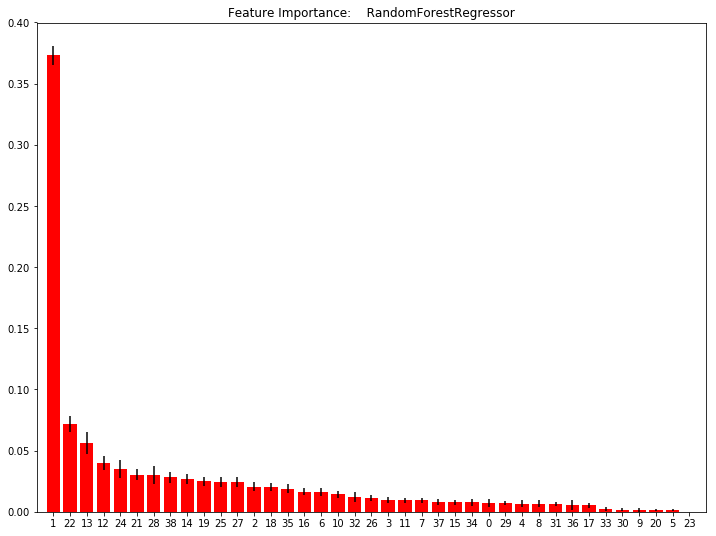

In [47]:
clf = RandomForestRegressor(n_estimators=300,random_state=0)
clf.fit(X, y)

importance = clf.feature_importances_
#importance = pd.DataFrame(importance, index=X.columns, columns=["Importance"])
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(12,9))
plt.title('Feature Importance:    RandomForestRegressor')
plt.bar(range(X.shape[1]),importance[indices],color = 'r' ,yerr = std[indices], align="center")
plt.xlim([-1,X.shape[1]])
plt.xticks(range(X.shape[1]),indices)
plt.show()

In [46]:
#print ("Top factors that affects revenue:"%s %s" % (list(X)[1],list(X)[22]))
print('The top factos the affect revenue are:')
print (', '.join([list(X)[1], list(X)[22],list(X)[13],list(X)[12],list(X)[24]]))

The top factos the affect revenue are:
ad_rank, mysterious_feature_2, dest_longitude, dest_latitude, referrer_id
